In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
pos = pd.read_excel('D:/VALIDASI/LDA/pos_belviu.xlsx')
pos.head()

,Review
0,bagus great africa lokasi wisata makan sarap g...
1,lantai pandang bagus sayang hujan foto foto ma...
2,lokasi jangkau bandara menit layan puas ruang ...
3,nyaman lantai lux premium kasur empuk handuk ...
4,lobi bagus nuansa rapat ruang fun makan malam ...


In [30]:
# save filtered data to csv
pos.to_csv('E:/PLSA/pos_belviu.csv', index_label = False)

In [31]:
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA

In [32]:
# loading default pipeline
pipeline = Pipeline(*DEFAULT_PIPELINE)
pipeline

Pipeline:
0: remove_non_ascii
1: to_lower
2: remove_numbers
3: tag_remover
4: punctuation_remover
5: tokenize
6: LemmatizeWords
7: RemoveStopwords
8: short_word_remover

In [33]:
# making corpus based on filtered csv
corpus = Corpus.from_csv('D:/VALIDASI/LDA/pos_belviu.csv', pipeline)
corpus

Corpus:
Number of documents: 687
Number of words:     1219

In [34]:
# creating PLSA object
plsa = PLSA(corpus, 4, True)
plsa

PLSA:
====
Number of topics:     4
Number of documents:  687
Number of words:      1219
Number of iterations: 0

In [35]:
# fitting process
# result = plsa.fit()
result = plsa.best_of(5)
plsa

PLSA:
====
Number of topics:     4
Number of documents:  687
Number of words:      1219
Number of iterations: 56

In [36]:
result

PlsaResult:
Number of topics:    4
Number of documents: 687
Number of words:     1219

In [37]:
# value of relative of latent topics (P(z|d))
result.topic

array([0.26993272, 0.26151437, 0.23471131, 0.2338416 ])

In [38]:
# print 10 words in class 0 and its value (P(w|z))
result.word_given_topic[0][:10]

(('pandang', 0.018017568858310472),
 ('ramah', 0.01504353923665129),
 ('strategis', 0.014957227459663734),
 ('lokasi', 0.014556815789994813),
 ('bagus', 0.013629976420565048),
 ('kolam', 0.012718546980299518),
 ('bersih', 0.012688659406011918),
 ('renang', 0.012679158845936653),
 ('rooftop', 0.012305875703699924),
 ('tarik', 0.012276041307987835))

In [39]:
# print 10 words in class 0 and its value
result.word_given_topic[1][:10]

(('mode', 0.018866360597734593),
 ('bagus', 0.017220187752338627),
 ('variasi', 0.015696287813401204),
 ('ramah', 0.01532855268480695),
 ('lokasi', 0.014288084370737338),
 ('renang', 0.013819951538521428),
 ('kolam', 0.013816282691927103),
 ('makan', 0.01358835338836893),
 ('strategis', 0.013543367120218471),
 ('bersih', 0.013234916542957113))

In [40]:
# print 10 words in class 0 and its value
result.word_given_topic[2][:10]

(('bersih', 0.01751520856683472),
 ('area', 0.01684969329749372),
 ('rapi', 0.01666551192736195),
 ('bagus', 0.01493440942964376),
 ('belanja', 0.01490847768506532),
 ('restoran', 0.01402753724176741),
 ('makan', 0.013059472004610816),
 ('ruang', 0.01285895127262874),
 ('pusat', 0.012768219699833043),
 ('mandi', 0.01233625179778949))

In [41]:
# print 10 words in class 0 and its value
result.word_given_topic[3][:10]

(('lantai', 0.019021556928671687),
 ('ramah', 0.016803981229754704),
 ('mantap', 0.015565427456130387),
 ('fasilitas', 0.015088818979910948),
 ('music', 0.014929415102579667),
 ('bagus', 0.014920417374172507),
 ('puas', 0.014313302449679275),
 ('pandang', 0.013817394691698938),
 ('keluarga', 0.013550604433096889),
 ('malam', 0.013483748604938485))

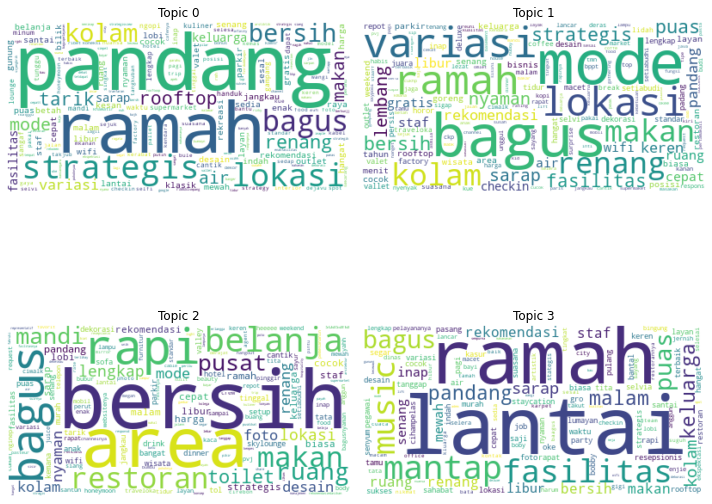

In [42]:
# plotting word per class / cluster with word cloud
visualize = Visualize(result)
fig = plt.figure(figsize=(10, 10))
_ = visualize.wordclouds(fig)

In [43]:
# find kl divergence value
result.kl_divergence

3.397620591830277

In [44]:
# change list shape
temp_data = []
temp_lab = []

for i in range (0,4):
    num_i = len(result.word_given_topic[i])
    
    t = []
    for j in range (0, num_i):
        t.append(result.word_given_topic[i][j][1])
    
    temp_data.extend(t)
    
    tmp = [i]*len(t)
    temp_lab.extend(tmp)

In [45]:
# change data list into dataframe type
# add dummy column to fulfill metrics condition (2D data input needed)
df_c = pd.DataFrame(temp_data)
dummy_li = [1] * len(temp_data)
df_c['bias'] = dummy_li

In [46]:
# calculate dispersion ratio
import numpy as np
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# arr_data = np.array(temp_list)
arr_lab = np.array(temp_lab)

db = davies_bouldin_score(df_c, arr_lab)
print('davies bouldin index : {}'.format(db))

ch = calinski_harabasz_score(df_c, arr_lab)
print('calinski harabasz index : {}'.format(ch))

davies bouldin index : 0.0
calinski harabasz index : 1.194729007065805e-26
